In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp

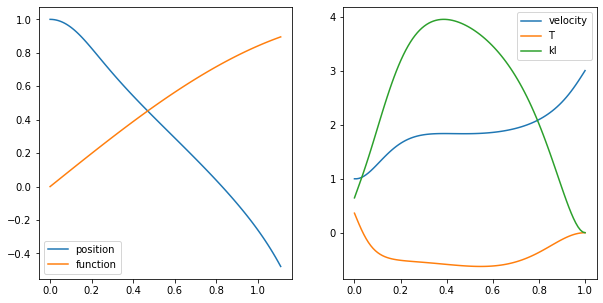

In [11]:
alpha = 20
beta = 0.5
lam = 0.5
g = 9.8
m = 2
kd = 0.5

# element 1: the ODE function
def ode(t, z):
    """ x = z[0], y = z[1], x' = z[2], y' = z[3] """
    """ P1 = z[4], P2 = z[5], P3 = z[6], P4 = z[7] """
    
    f = lambda x: np.sin(x)
    f_prime = lambda x: np.cos(x)
    
    T = (z[6] * z[2] + z[7] * z[3]) / (2 * beta * m * (z[2]**2 + z[3]**2)**(1/2))
    kl = (1 / (2 * lam * m)) * ( (z[2]**2 + z[3]**2)**(1/2) * 
                              ( -z[6] * (z[2] + z[3])
                              + (z[7] * (z[2] - z[3])) ) )
    
    cos = z[2] / np.sqrt(z[2]**2 + z[3]**2)
    sin = z[3] / np.sqrt(z[2]**2 + z[3]**2)
    sq_rt = np.sqrt(z[2]**2 + z[3]**2)
    
    zX = (1/m) * ( (z[2]**2 + z[3]**2) * ( (-kd - kl) * cos 
                - kl * sin ) + T * cos)
    zY = (1/m) * ( (z[2]**2 + z[3]**2) * ( kl * cos
                + (-kd - kl) * sin ) + T * sin - m * g )
    
    P1 = -2 * alpha * z[1] * f_prime(z[0]) + 2 * alpha * f(z[0]) * f_prime(z[0])
    
    P2 = 2 * alpha * z[1] - 2 * alpha * f(z[0])
    
    P3 = -z[4] - (z[6] / m) * ( (-z[2]**2 * (kd + kl) - kl * z[2] * z[3] + T) / sq_rt
            - (kd + kl) * sq_rt - T * z[2]**2 / (sq_rt**3) ) - (z[7] / m) * (
            kl * sq_rt + (kl * z[2]**2 - z[2] * z[3] * (kd + kl)) / sq_rt - 
            T * z[2] * z[3] / (sq_rt**3) )
    
    P4 = -z[5] - (z[6] / m) * ( -z[2] * z[3] * (kd + kl) / sq_rt - kl * sq_rt
            - kl * z[3] / sq_rt - T * z[2] * z[3] / (sq_rt**3) ) - (z[7] / m) * (
            (kl * z[2] * z[3] - z[3]**2 * (kd + kl) + T) / sq_rt - (kd + kl) * sq_rt
             - T * z[3]**2 / (sq_rt**3) )
    
    # return np.vstack((x', y', x'', y'', p1', p2', p3', p4'))
    return np.vstack((z[2], z[3], zX, zY, P1, P2, P3, P4))


# Now define a function that treats the boundary conditions.
def bc(ya, yb):
    x0 = 0
    y0 = 1
    vx0 = 1
    vy0 = 0

    return np.array([ya[0] - x0, ya[1] - y0, ya[2] - vx0, ya[3] - vy0,
                     yb[4], yb[5], yb[6], yb[7]])

# Now compute the solution. We may need more than 10 points...
tf = 1
t = np.linspace(0, tf, 20)
y = np.zeros((8, t.size)) + 0.0001 #specify an 'initial guess' for the soln y
res = solve_bvp(ode, bc, t, y)

# Plotting the results (if desired)
t_plot = np.linspace(0, 1, 100)
x_plot = res.sol(t_plot)[0]
y_plot = res.sol(t_plot)[1]
x_prime_plot = res.sol(t_plot)[2]
y_prime_plot = res.sol(t_plot)[3]
p1_plot = res.sol(t_plot)[4]
p2_plot = res.sol(t_plot)[5]
p3_plot = res.sol(t_plot)[6]
p4_plot = res.sol(t_plot)[7]

T_plot = (p3_plot * x_prime_plot + p4_plot * y_prime_plot) / (2 * beta * m * (x_prime_plot**2 + y_prime_plot**2)**(1/2))
kl_plot = (1 / (2 * lam * m)) * ( (x_prime_plot**2 + y_prime_plot**2)**(1/2) * 
                          ( -p3_plot * (x_prime_plot + y_prime_plot)
                          + (p4_plot * (x_prime_plot - y_prime_plot)) ) )

domain = np.linspace(0, x_plot[-1], 100)

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x_plot, y_plot, label="position") # the control state
ax1.plot(domain, np.sin(domain), label="function")
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(t_plot, np.sqrt(x_prime_plot**2 + y_prime_plot**2), label="velocity") # the velocity state
ax2.plot(t_plot, T_plot, label="T") # the T control
ax2.plot(t_plot, kl_plot, label="kl") # the kl control
ax2.legend()

plt.show()